# Tarea N°3


<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Machine Learning: Laboratorio 03
*12 de Octubre de 2024*

**Nombre Estudiante(s)**: `Gabriel Álvarez Martínez - Valeska Farías Caicedo - Constanza Perez Pulido - Rosario Valderrama Labarca


## 1. Objetivo

En este laboratorio deberá *aplicar* los algoritmos aprendidos en la clase e investigar del uso de la libreria python scikit-learn y sus funciones más útiles para estos métodos. Su meta es realizar un análisis de datos completo probando los distintos métodos supervisados vistos hasta ahora (Naive Bayes, Análisis de Discriminante, Regresión Logística).

Para esto utilizará la base load_breast_cancer anteriormente utilizada. Además los siguientes comandos de la librería sklearn, para la siguiente base:

```
# X, y =fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X.drop(['boat', 'body', 'home.dest'], axis=1, inplace=Tru```
```

Por último, nos gustaría saber el destino de los dos pasajeros de los cuales se presentan sus boletos en el Titanic. También, nos interesa entender si la edad es un elemento determinante para la sobrevida.

## 2. Introducción  

En el presente laboratorio se utilizaron dos dataframe:

- load_breast_cancer, con el cual se pretende entrenar un modelo para predecir si el tumor de un paciente es maligno o benigno.
- titanic, cel este df se desea predecir si los pasajeros sobreviven o no.

Para lograr lo anterior, se utilizaron algoritmos de clasificación supervisados, para eso se utilizará Análisis de Discriminante Lineal (LDA) con el primer df (load_breast_cancer) y se realizará una regresión lineal además de  Naive Bayes para el df Titanic.

Adcionalmente, se desea conocer el destino de dos pasajeros en específico que mantienen las siguientes caracteristicas según su ticket de embarque:  

Pasajero N°1:  

  - Nombre: Miss Helene ragnhild Ostby
  - Sexo: Femenino
  - Edad: 22 años
  - Clase en la que viaja: 1ra. clase
  - Cabin: B-36
  - Embarque: Cherbourg  

Pasajero N°2:  
  - Nombre: Mr. Frederick Edward Giles
  - Sexo: Masculino
  - Edad: 21
  - Clase en la que viaja: 2da. clase
  - Cabin: Desconocida
  - Embarque: Southampton  

Para predecir si los dos pasajeros indicados sobreviven o no, se utiliza un árbol de clasificación que será entrenado para identificar las caracteristicas de los pasajeros que sobreviven y los que no, luego de eso podremos determinar el destino de ambos. el destino de ambos.

## 3. Importación de paquetes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

## 4. Obtención del Dataset

### 4.2. load_titanic

In [2]:
X_titanic, y_titanic = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
print(X_titanic.columns)

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [3]:
X_titanic.head(5)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
print("Dimensiones del dataset (filas, columnas):", X_titanic.shape)

print("\nInformación general del dataset:")
print(X_titanic.info())

print("\nValores nulos por columna:")
print(X_titanic.isnull().sum())

Dimensiones del dataset (filas, columnas): (1309, 13)

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 115.4+ KB
None

Valores nulos por columna:
pclass          0
name            0
sex             0
age           263
sibsp   

**pclass:**
Clase del boleto del pasajero.
*Valores:*
1: Primera clase
2: Segunda clase
3: Tercera clase

**name:**
Nombre del pasajero.

**sex:**
Sexo del pasajero.
*Valores:*
"male": Hombre
"female": Mujer

**age:**
Edad del pasajero en años.
*Valores:*
Numérica (entero), con presencia de NaN.

**sibsp:**
Número de hermanos y cónyuges a bordo del Titanic.
*Valores:*
Número entero.

**parch:**
Número de padres e hijos a bordo del Titanic.
*Valores:*
Número entero.

**ticket:**
Número de ticket del pasajero por el boleto.

**fare:**
Tarifa pagada por el pasajero por su billete.
*Valores:* Precio en libras.

**cabin:**
Identificación de cabina del pasajero a bordo.

**embarked:**
Puerto donde el pasajero embarcó.
*Valores:*
"C": Cherburgo
"Q": Queenstown
"S": Southampton
Tipo: Categórica.

**boat:**
Número de bote que rescató al pasajero luego del hundimiento.

**body:**
Número de cuerpo que se encontró luego del hundimiento.

**home.dest:**
Lugar de destino o lugar de residencia.

# MÉTODOS SUPERVISADOS

# *Incluir interpretación de LDA*

## DF Titanic

Para este método se utlizará el data frame Titanic,  que tiene las siguientes variables:  

- survived: Indica si el pasajero sobrevivió (1) o no (0).
- pclass: Clase del boleto del pasajero (1ra, 2da, 3ra clase).
- sex: Género del pasajero.
- age: Edad del pasajero.
- sibsp: Número de hermanos/cónyuges a bordo.
- parch: Número de padres/hijos a bordo.
- fare: Tarifa pagada por el boleto.
- embarked: Puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton).
- survived: indica si el pasajero sobrevive 1, no sobrevive 0. (target)  
  
Sin embargo, para utlizar el df Titanic debemos realizar un análisis previo respecto de como se manejaran los datos nulos, para ello se realizará lo siguiente:  

 - Identificar que variables tienen valores nulos
 - Seleccionar el método que se utilizará para imputar los valores nulos


In [5]:
X_titanic, y_titanic = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X_titanic.drop(['boat', 'body', 'home.dest'], axis=1, inplace=True)

In [6]:
#nombres de las columnas (variables)
print(X_titanic.columns)

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked'],
      dtype='object')


In [7]:
# indentifica las columnas con nulos
print(X_titanic.isnull().sum())

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64


In [8]:
#identifica los nulos en target
print(y_titanic.isnull().sum())

0


Al revisar la cantidad de datos nulos que contiene el data frame titanic, observamos que la variable **age (edad)** tiene 263 observaciones nulas y **cabin (cabina)**. Para solucionar esto utilizaremos imputación de datos con la moda, pero condiconada a otras variable para lograr mayor acertividad al momento de imputar.  

- Para *cabin* utilizamos *pclass* y *sex* para imputar según la moda del grupo.
- Para *age* utlizamos *pclass* , *sex*  y *cabin* para imputar según la moda del grupo.

Al realizar estos pasos se lograr imputar la totalidad de los nulos en *cabin*, sin embargo, en *age* quedan 16 observaciones que no es posible imputar porque no existe una moda para la combinación de valores de las 3 variables en conjunto, por lo tanto en el caso de esas 16 observaciones se imputará con la media de *age* por si sola.

**NOTA: cambie el nombre de X, y a X1, y1 para diferenciar los nombres con la base de cancer**

In [9]:
# reemplazamos con la moda según pclass y sex
X_titanic['cabin'] = X_titanic['cabin'].astype('category')

# Función para imputar la moda condicionalmente
def impute_mode(row):
    if pd.isnull(row['cabin']):
        mode_value = X_titanic[(X_titanic['pclass'] == row['pclass']) & (X_titanic['sex'] == row['sex'])]['cabin'].mode()
        return mode_value[0] if not mode_value.empty else row['cabin']  # Retorna la moda si existe
    else:
        return row['cabin']

# Aplicar la función
X_titanic['cabin'] = X_titanic.apply(impute_mode, axis=1)

# Comprobar resultados
print(X_titanic['cabin'].isnull().sum())

0


In [10]:
# reemplazamos con la moda considerando pclass, sex y cabin
X_titanic['age'] = X_titanic['age'].astype('category')

# Función para imputar la moda condicionalmente
def impute_mode(row):
    if pd.isnull(row['age']):
        mode_value = X_titanic[(X_titanic['pclass'] == row['pclass']) & (X_titanic['sex'] == row['sex']) & (X_titanic['cabin'] == row['cabin'])]['age'].mode()
        return mode_value[0] if not mode_value.empty else row['age']  # Retorna la moda si existe
    else:
        return row['age']

# Aplicar la función
X_titanic['age'] = X_titanic.apply(impute_mode, axis=1)

# Comprobar resultados
print(X_titanic['age'].isnull().sum())

16


quedan 16 observaciones con datos nulos, esto puede ser debido a que no existe una moda para el cruce de variables propuesto. Asi que imputamos por la media de *age*

In [11]:
# Calcular la media de la columna 'Age'
mean_age = X_titanic['age'].mean()

# Imputar los valores faltantes con la media
X_titanic.fillna({'age': mean_age}, inplace=True)

# Verificar que no haya más valores faltantes en 'Age'
print(X_titanic['age'].isnull().sum())

0


In [12]:
X_titanic.fillna({'fare': X_titanic['fare'].mean()}, inplace=True)

# Regresión Logística  

AL no existir nulos, los datos están preparados para aplicar Regresión Logística y Naive Bayes

In [13]:
X_titanic.drop(['name', 'ticket', 'cabin', 'embarked'], axis=1, inplace=True)
X_titanic['sex'] = X_titanic['sex'].map({'male': 0, 'female': 1})
print(X_titanic)

      pclass sex      age  sibsp  parch      fare
0          1   1  29.0000      0      0  211.3375
1          1   0   0.9167      1      2  151.5500
2          1   1   2.0000      1      2  151.5500
3          1   0  30.0000      1      2  151.5500
4          1   1  25.0000      1      2  151.5500
...      ...  ..      ...    ...    ...       ...
1304       3   1  14.5000      1      0   14.4542
1305       3   1  18.0000      1      0   14.4542
1306       3   0  26.5000      0      0    7.2250
1307       3   0  27.0000      0      0    7.2250
1308       3   0  29.0000      0      0    7.8750

[1309 rows x 6 columns]


In [15]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión logística
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)


X1: Contiene las características (todas las columnas excepto 'target').

y1: Contiene la etiqueta (columna 'target').

Luego, se dividen los datos en conjuntos de entrenamiento y prueba, y se entrena un modelo de Regresión Logística.

In [16]:
# Calcular la precisión (accuracy) y el recall
accuracy_rl = accuracy_score(y_test, y_pred)
recall_rl = recall_score(y_test, y_pred, pos_label='1')

print(f"Exactitud del modelo (RL): {accuracy_rl:.4f}")
print(f"Recall del modelo (RL): {recall_rl:.4f}")

Exactitud del modelo (RL): 0.7786
Recall del modelo (RL): 0.6441


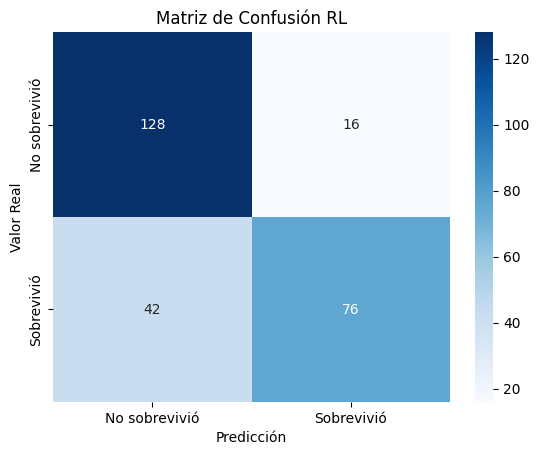

In [17]:
# Calcular la matriz de confusión
conf_matrix_rl = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
sns.heatmap(conf_matrix_rl, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión RL')
plt.show()

# Destino de los pasajeros